In [5]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [9]:
from glob import glob

In [11]:
glob('1_gecco2018_water_quality.csv')

[]

In [28]:
water_df = pd.read_csv('1_gecco2018_water_quality.csv')

In [30]:
water_df = water_df.drop(['Unnamed: 0'], axis =1)

In [32]:
water_df

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False
...,...,...,...,...,...,...,...,...,...,...,...
139561,2016-11-08 08:50:00,10.1,0.16,8.41,762.0,189.0,0.023,0.105,1799.0,924.0,False
139562,2016-11-08 08:51:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1835.0,927.0,False
139563,2016-11-08 08:52:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1807.0,924.0,False
139564,2016-11-08 08:53:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1799.0,930.0,False


In [34]:
import seaborn as sns

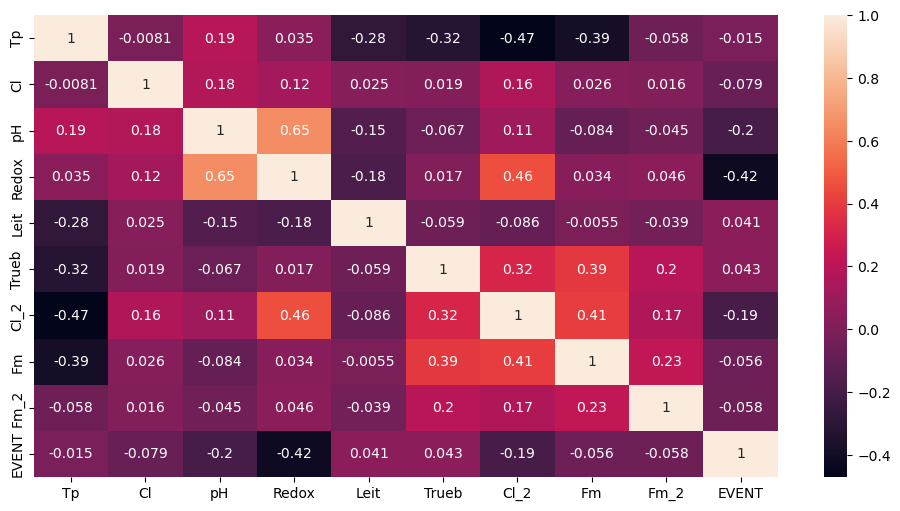

In [36]:
plt.figure(figsize=(12, 6))
water_cor = water_df.corr(numeric_only=True)
sns.heatmap(water_cor , annot=True);


In [38]:
# water_df.dropna(subset=['pH', 'Cl', 'Time'], inplace=True)
# plt.plot(water_df.pH,water_df.Time, label='pH', color = 'blue')
# plt.plot(water_df.Cl,water_df.Time, label = 'Cl' , color = 'red')
# plt.title("Water pH Level and cl Concentration Over Time")
# plt.xlabel("pH and Cl concentration")
# plt.ylabel("Time")
# plt.grid(color = 'grey', linestyle = '--')
# plt.legend()
# plt.show()
# plt.savefig("plotst.png")

# Cleaning the dataset

In [41]:
water_df.dropna(inplace=True)
water_df['Time'] = pd.to_datetime(water_df['Time'])
water_df['Date'] = water_df['Time'].dt.date
water_df['Time_only'] = water_df['Time'].dt.time
water_df['Month'] = water_df['Time'].dt.month
water_df['Hours'] = water_df['Time'].dt.hour
water_df['Day of week'] = water_df['Time'].dt.day_name()

In [43]:
water_df.head()

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,2016-08-03,11:49:00,8,11,Wednesday
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,2016-08-03,11:50:00,8,11,Wednesday
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,2016-08-03,11:51:00,8,11,Wednesday
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,2016-08-03,11:52:00,8,11,Wednesday
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,2016-08-03,11:53:00,8,11,Wednesday


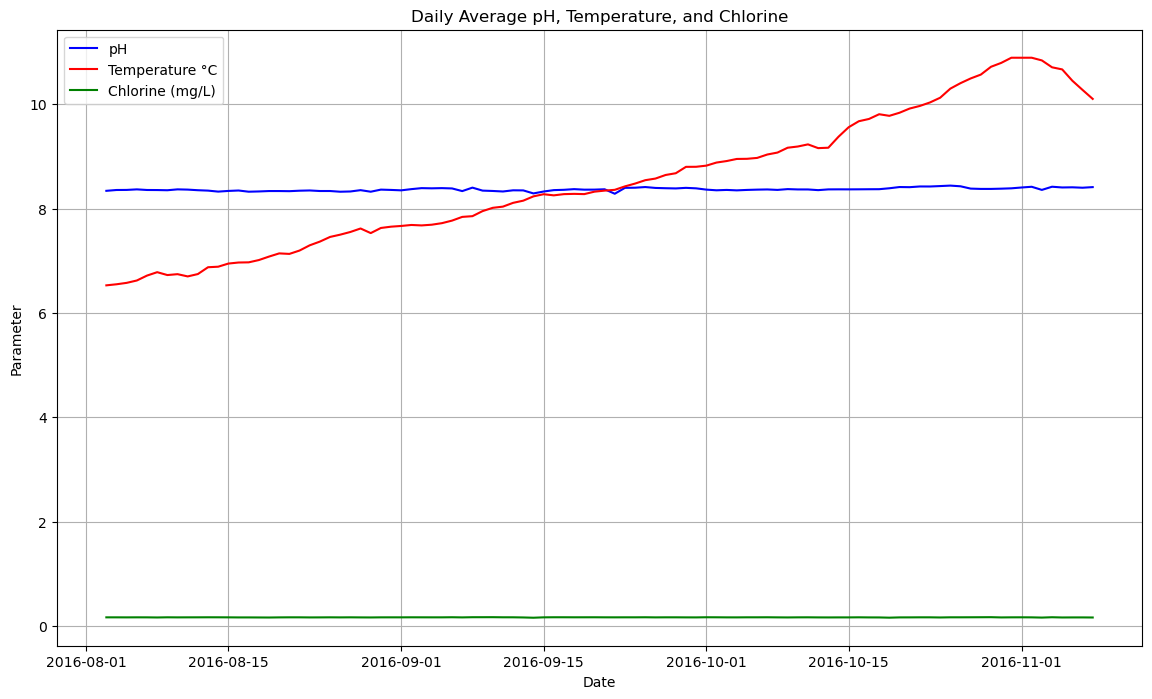

In [45]:
daily_avg= water_df.groupby('Date').agg({'pH': 'mean','Tp': 'mean','Cl': 'mean'}).reset_index()
plt.figure(figsize=(14, 8))

plt.plot(daily_avg['Date'], daily_avg['pH'], label='pH', color='blue')
plt.plot(daily_avg['Date'], daily_avg['Tp'], label='Temperature °C', color='red')
plt.plot(daily_avg['Date'], daily_avg['Cl'], label='Chlorine (mg/L)', color='green')
plt.xlabel('Date')
plt.ylabel('Parameter')
plt.title('Daily Average pH, Temperature, and Chlorine')
plt.legend()
plt.grid()
plt.show()

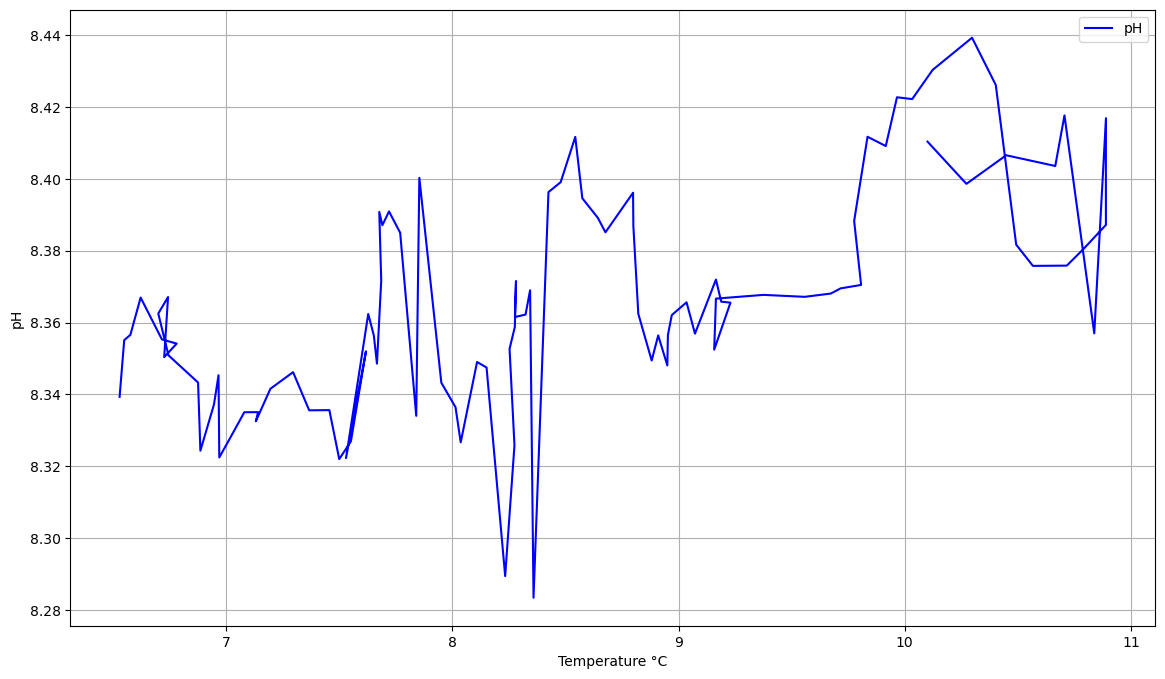

In [47]:
plt.figure(figsize=(14, 8))
plt.plot( daily_avg['Tp'], daily_avg['pH'], label='pH', color='Blue')
plt.xlabel('Temperature °C')
plt.ylabel('pH')

plt.legend()
plt.grid()
plt.show()

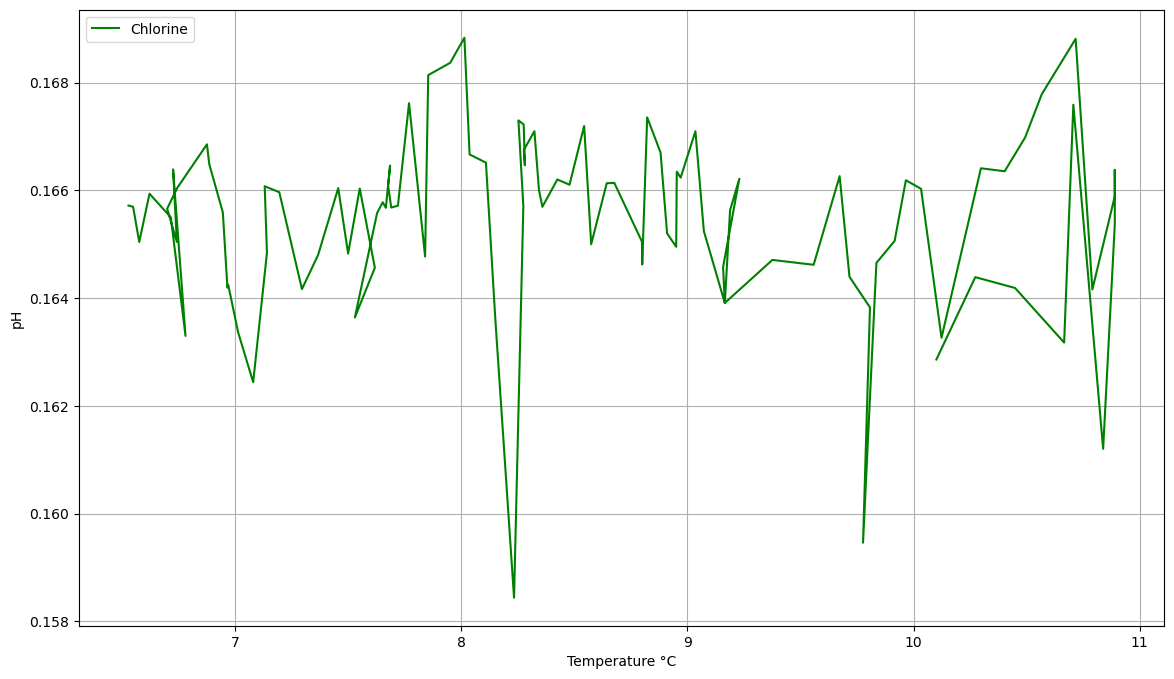

In [49]:
plt.figure(figsize=(14, 8))
plt.plot( daily_avg['Tp'], daily_avg['Cl'], label='Chlorine', color='green')
plt.xlabel('Temperature °C')
plt.ylabel('pH')

plt.legend()
plt.grid()
plt.show()

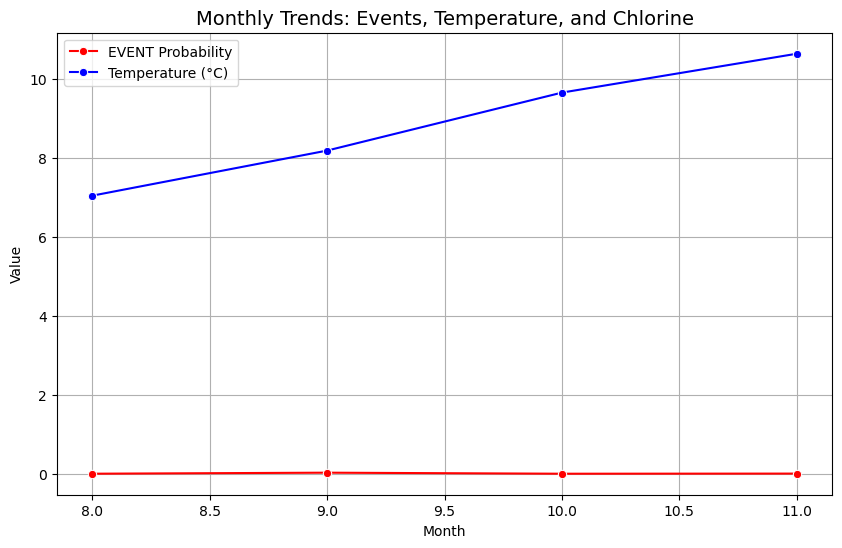

In [51]:
monthly_avg = water_df.groupby('Month').agg({'EVENT': 'mean', 'Tp': 'mean', 'Cl': 'mean'})
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='EVENT', marker='o', label='EVENT Probability', color='red')
sns.lineplot(data=monthly_avg, x='Month', y='Tp', marker='o', label='Temperature (°C)', color='blue')
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Monthly Trends: Events, Temperature, and Chlorine", fontsize=14)
plt.legend()
plt.grid()
plt.show()

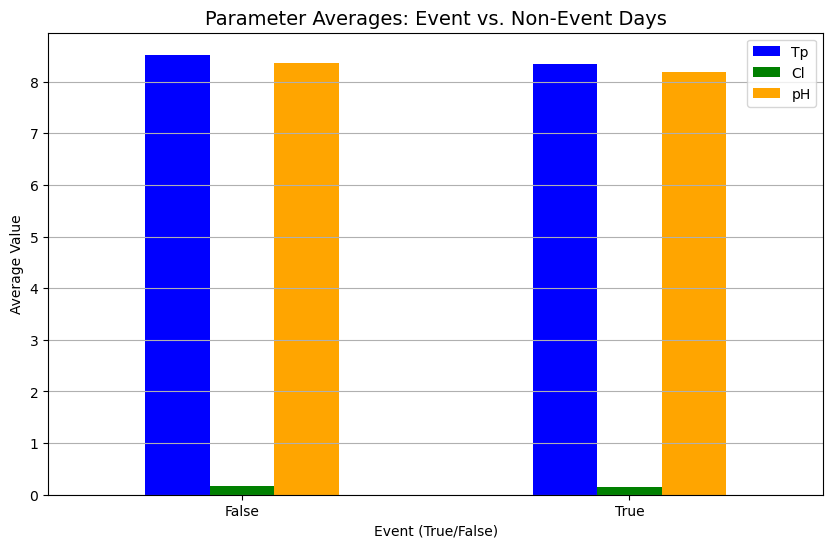

In [53]:
event_avg = water_df.groupby('EVENT').agg({'Tp': 'mean', 'Cl': 'mean', 'pH': 'mean'})
event_avg.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange'])
plt.title("Parameter Averages: Event vs. Non-Event Days", fontsize=14)
plt.xlabel("Event (True/False)")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

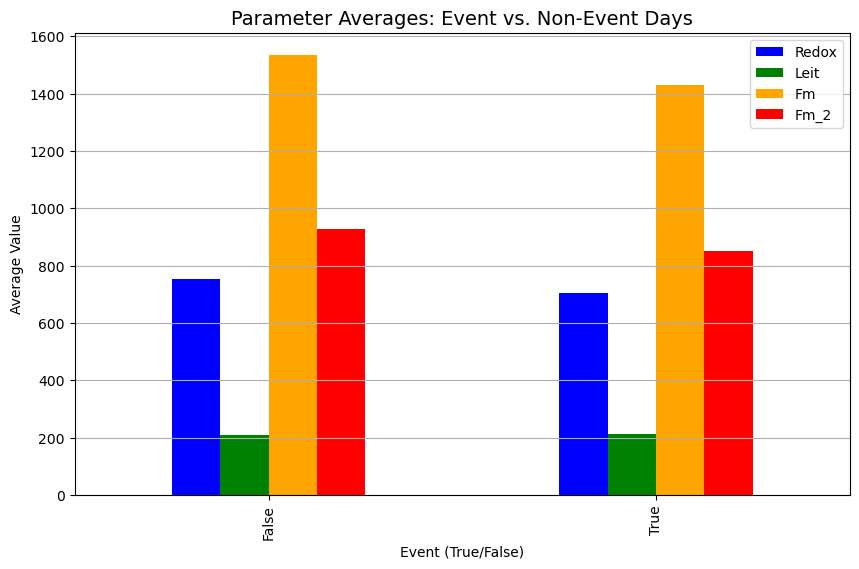

In [55]:
event_avg = water_df.groupby('EVENT').agg({'Redox': 'mean', 'Leit': 'mean', 'Fm': 'mean','Fm_2': 'mean'})
event_avg.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange','red'])
plt.title("Parameter Averages: Event vs. Non-Event Days", fontsize=14)
plt.xlabel("Event (True/False)")
plt.ylabel("Average Value")
plt.grid(axis='y')
plt.show()

# EVENT BY MONTH

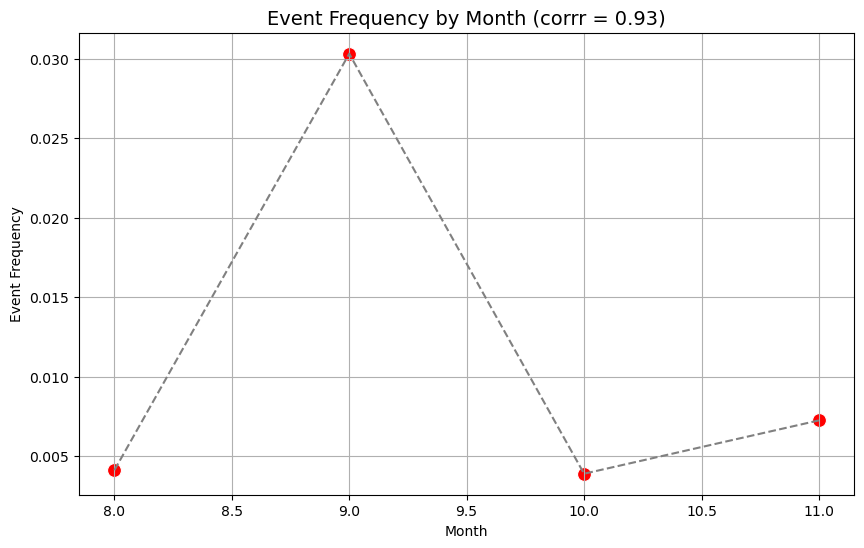

In [58]:
event_freq = water_df.groupby('Month')['EVENT'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=event_freq, x='Month', y='EVENT', s=100, color='red')
plt.plot(event_freq['Month'], event_freq['EVENT'], linestyle='--', color='gray')
plt.xlabel("Month")
plt.ylabel("Event Frequency")
plt.title("Event Frequency by Month (corrr = 0.93)", fontsize=14)
plt.grid()
plt.show()

In [60]:
event_freq

,Month,EVENT
0,8,0.004118
1,9,0.030324
2,10,0.003898
3,11,0.007254


# EVENT BY Hours

In [63]:
water_df.columns

Index(['Time', 'Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm',
       'Fm_2', 'EVENT', 'Date', 'Time_only', 'Month', 'Hours', 'Day of week'],
      dtype='object')

KeyError: 'Hours'

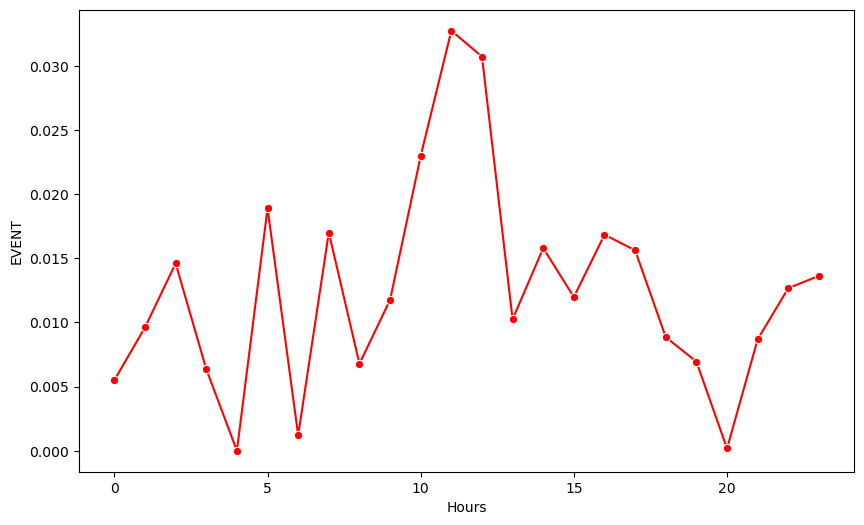

In [65]:
event_freq_date = water_df.groupby('Hours')['EVENT'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=event_freq_date , x='Hours', y='EVENT', marker = 'o' , color='red')
plt.plot(event_freq['Hours'], event_freq['EVENT'], linestyle='--', color='gray')
plt.xlabel('Hours')
plt.ylabel("Event Frequency")
plt.title("Event Frequency by day", fontsize=14)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=water_df, x='Month', y='pH', palette='coolwarm',hue = 'Tp', legend = False)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Distribution by Month", fontsize=14)
plt.grid()
plt.show()

In [ ]:
sns.pairplot(
    water_df[['EVENT', 'Month', 'Tp', 'Cl', 'pH']],
    hue='EVENT',
    palette='Set1',
    corner=True
)
plt.suptitle("Pairwise Relationships for Key Variables", y=1.02)
plt.show()


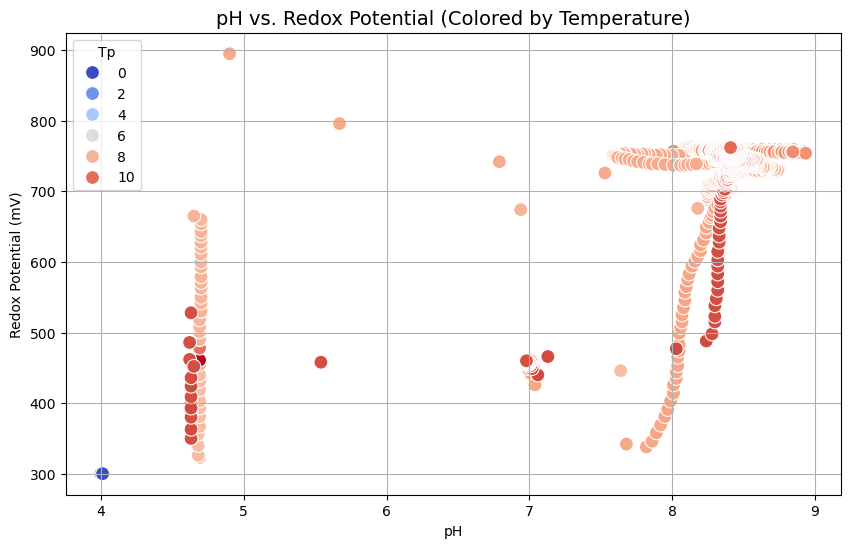

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=water_df, x='pH', y='Redox', hue='Tp', palette='coolwarm', s=100)
plt.title("pH vs. Redox Potential (Colored by Temperature)", fontsize=14)
plt.xlabel("pH")
plt.ylabel("Redox Potential (mV)")
plt.grid()
plt.show()

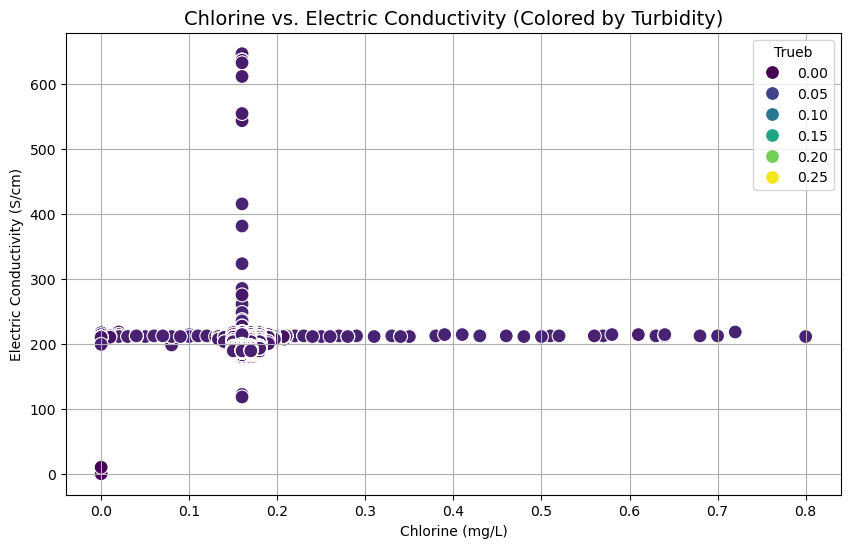

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=water_df, x='Cl', y='Leit', hue='Trueb', palette='viridis', s=100)
plt.title("Chlorine vs. Electric Conductivity (Colored by Turbidity)", fontsize=14)
plt.xlabel("Chlorine (mg/L)")
plt.ylabel("Electric Conductivity (S/cm)")
plt.grid()
plt.show()

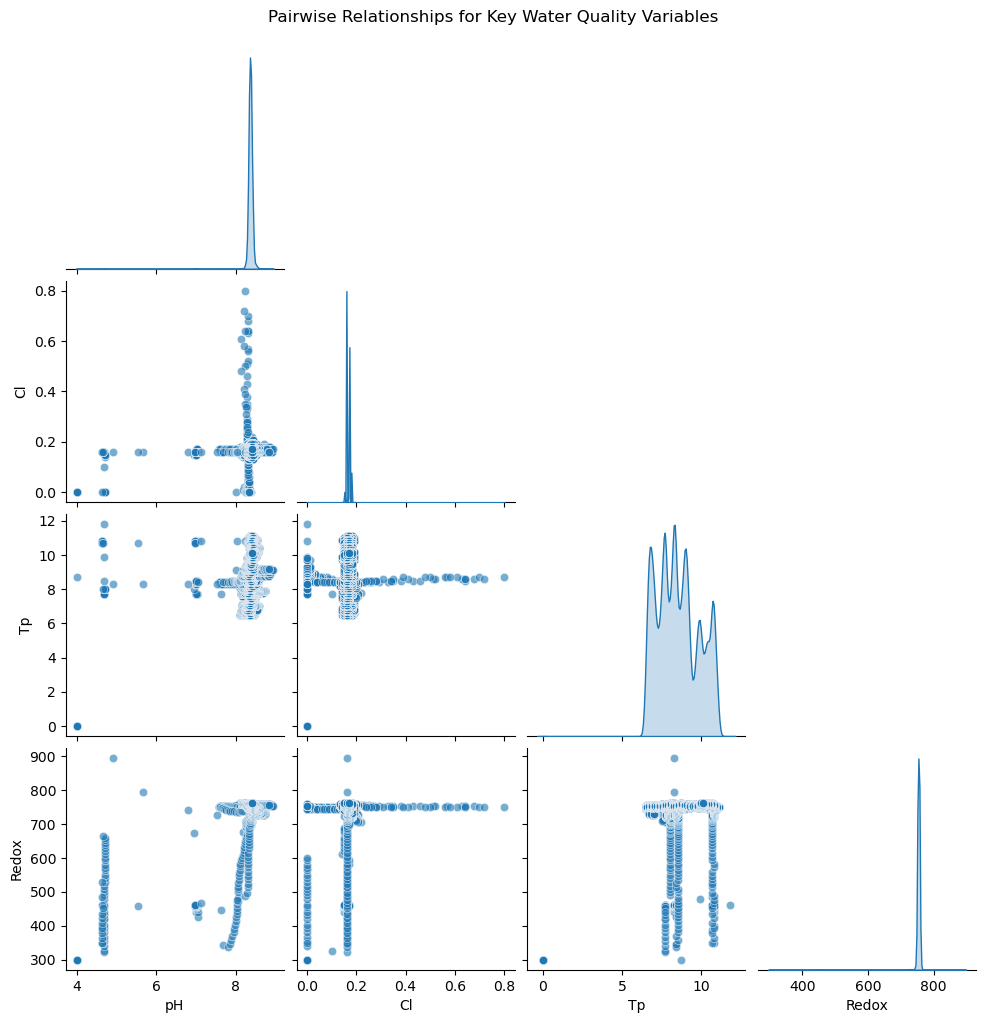

In [71]:
sns.pairplot(
    water_df[['pH', 'Cl', 'Tp', 'Redox']],
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle("Pairwise Relationships for Key Water Quality Variables", y=1.02)
plt.show()

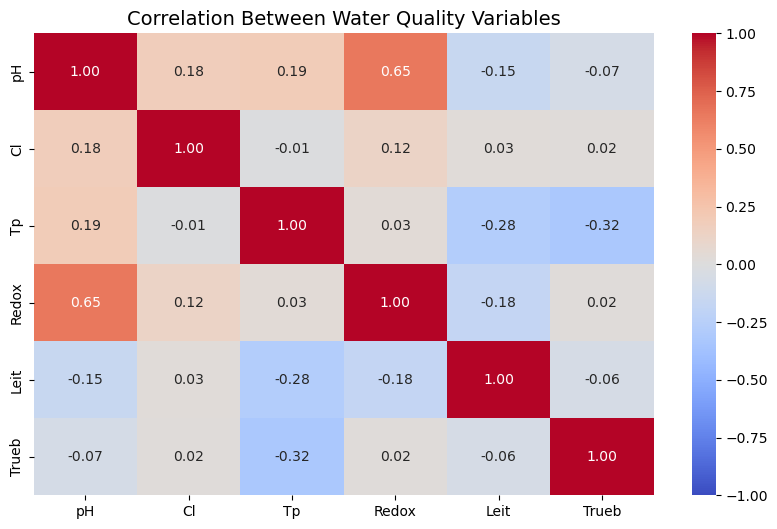

In [72]:
water_quality_corr = water_df[['pH', 'Cl', 'Tp', 'Redox', 'Leit', 'Trueb']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(water_quality_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Between Water Quality Variables", fontsize=14)
plt.show()

/var/folders/hl/wq3dn63145945_d7bjdb1txm0000gn/T/ipykernel_39182/662024311.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=water_df, x='Tp', y='Leit', ci=None, marker='o', color='green')


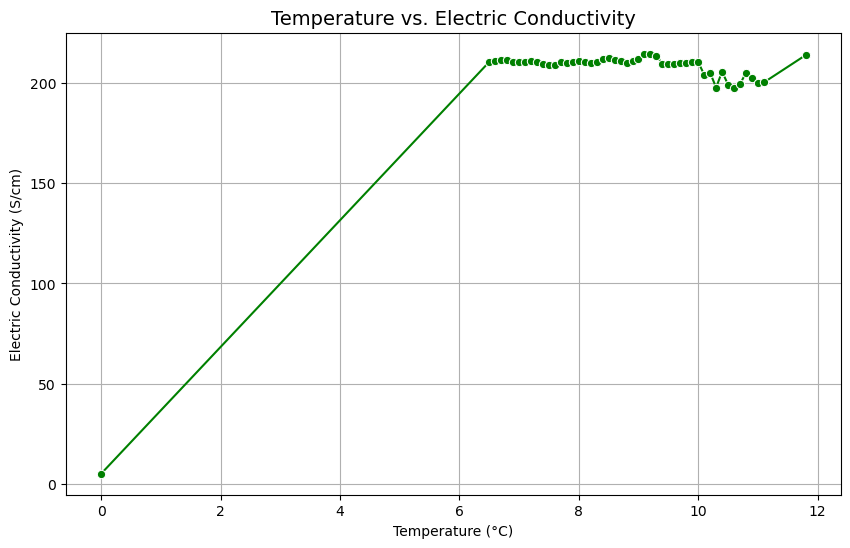

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=water_df, x='Tp', y='Leit', ci=None, marker='o', color='green')
plt.title("Temperature vs. Electric Conductivity", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Electric Conductivity (S/cm)")
plt.grid()
plt.show()

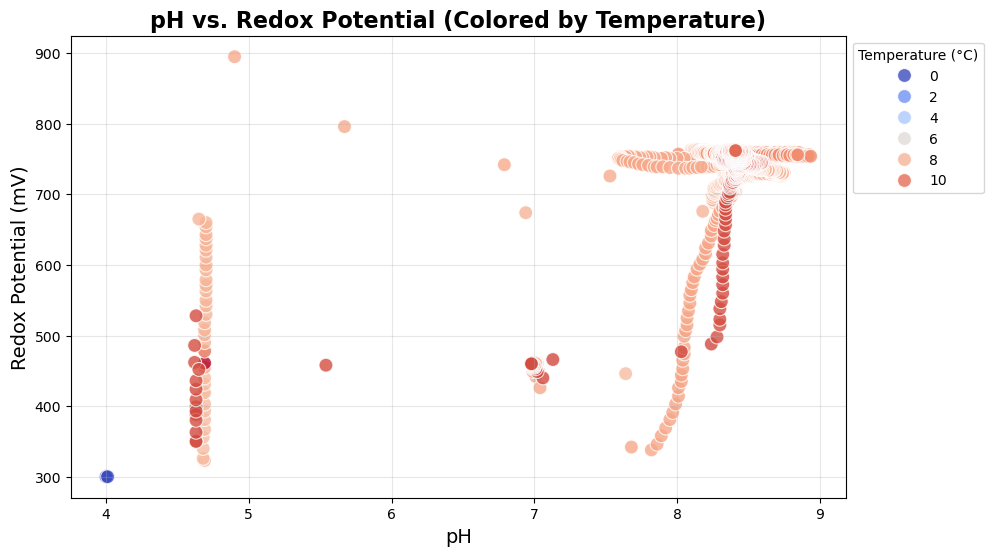

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=water_df, x='pH', y='Redox', hue='Tp', palette='coolwarm', s=100, alpha=0.8)
# sns.lineplot(data=water_df, x='pH', y='Redox',  ci=None, marker='o', color='green')
plt.title("pH vs. Redox Potential (Colored by Temperature)", fontsize=16, fontweight='bold')
plt.xlabel("pH", fontsize=14)
plt.ylabel("Redox Potential (mV)", fontsize=14)
plt.legend(title="Temperature (°C)",bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(alpha  = 0.3)
plt.show()

/var/folders/hl/wq3dn63145945_d7bjdb1txm0000gn/T/ipykernel_39182/138440655.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=water_df, x='Cl', y='Leit' ,palette='viridis',ci = False )
/var/folders/hl/wq3dn63145945_d7bjdb1txm0000gn/T/ipykernel_39182/138440655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=water_df, x='Cl', y='Leit' ,palette='viridis',ci = False )


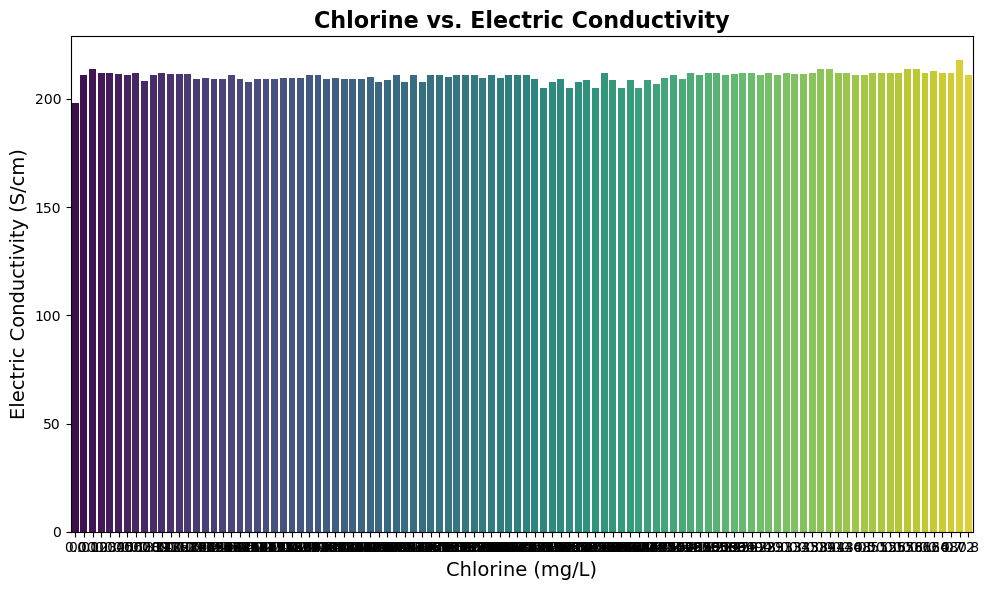

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data=water_df, x='Cl', y='Leit' ,palette='viridis',ci = False )
plt.title("Chlorine vs. Electric Conductivity", fontsize=16, fontweight='bold')
plt.xlabel("Chlorine (mg/L)", fontsize=14)
plt.ylabel("Electric Conductivity (S/cm)", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/hl/wq3dn63145945_d7bjdb1txm0000gn/T/ipykernel_39182/3525587374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=water_df, x='Trueb', y='pH', palette='Blues', width=0.6)


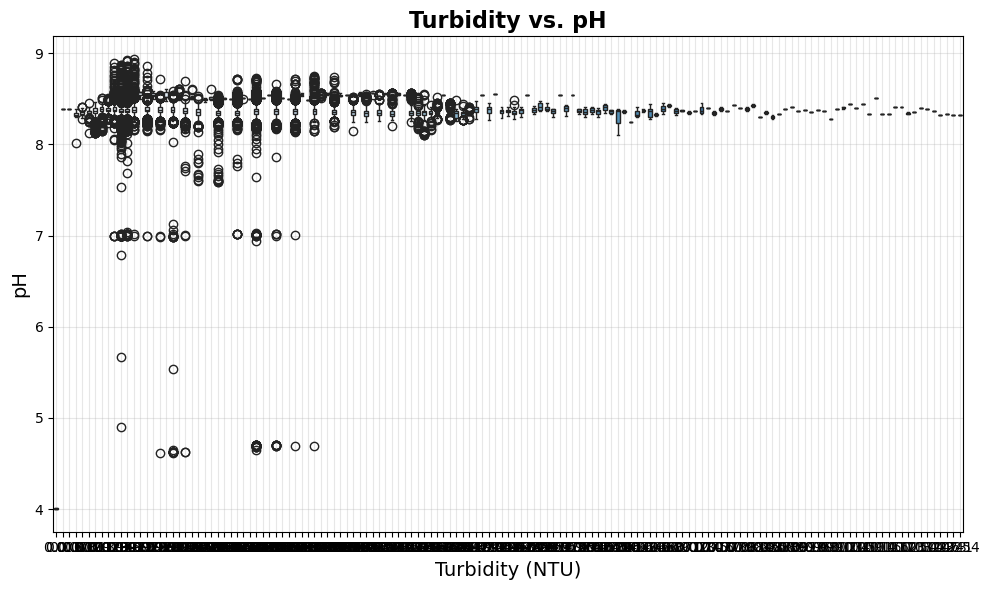

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=water_df, x='Trueb', y='pH', palette='Blues', width=0.6)
plt.title("Turbidity vs. pH", fontsize=16, fontweight='bold')
plt.xlabel("Turbidity (NTU)", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

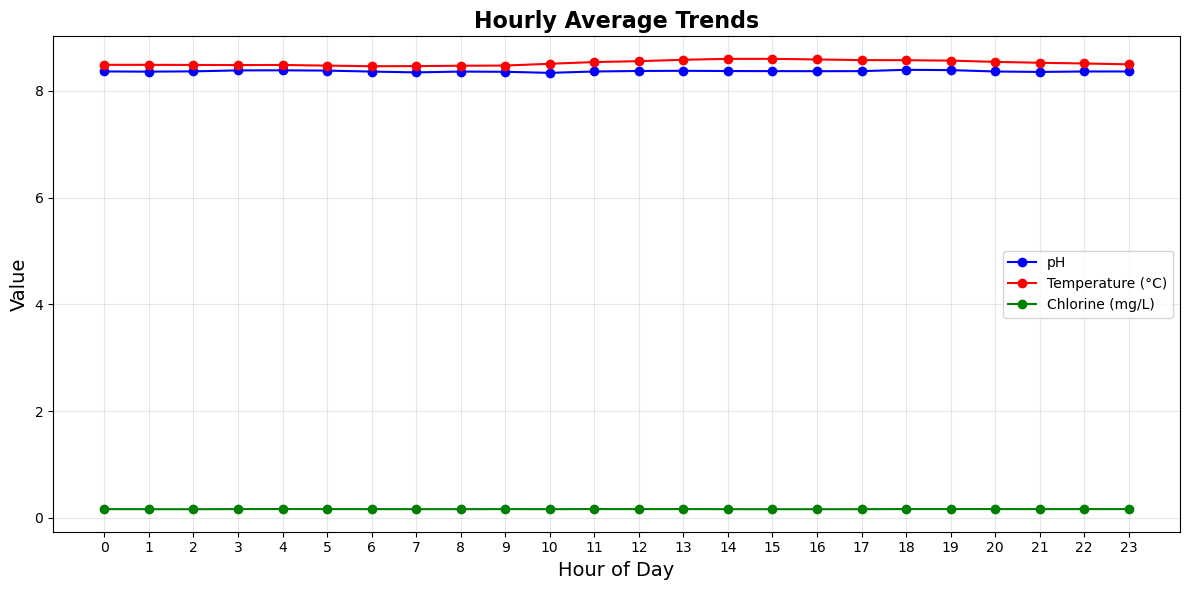

In [78]:
hourly_avg = water_df.groupby('Hours').agg({'pH': 'mean', 'Tp': 'mean', 'Cl': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg['Hours'], hourly_avg['pH'], marker='o', label='pH', color='blue')
plt.plot(hourly_avg['Hours'], hourly_avg['Tp'], marker='o', label='Temperature (°C)', color='red')
plt.plot(hourly_avg['Hours'], hourly_avg['Cl'], marker='o', label='Chlorine (mg/L)', color='green')
plt.title("Hourly Average Trends", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/hl/wq3dn63145945_d7bjdb1txm0000gn/T/ipykernel_39182/2198571288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=water_df, x='Hours', y='pH', palette='Blues')


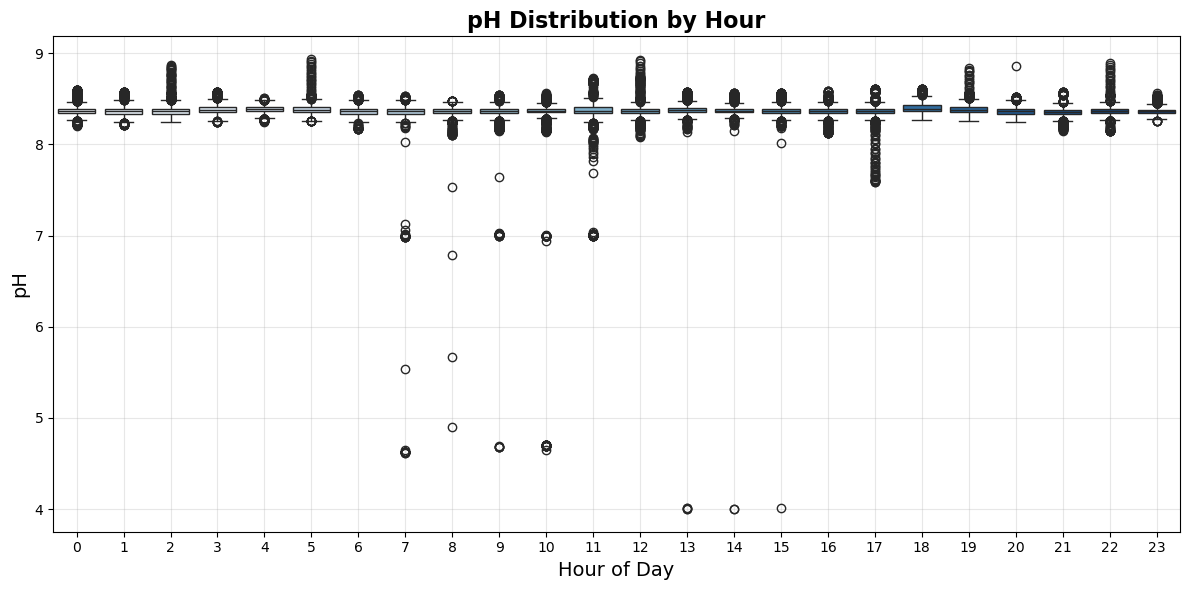

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=water_df, x='Hours', y='pH', palette='Blues')
plt.title("pH Distribution by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

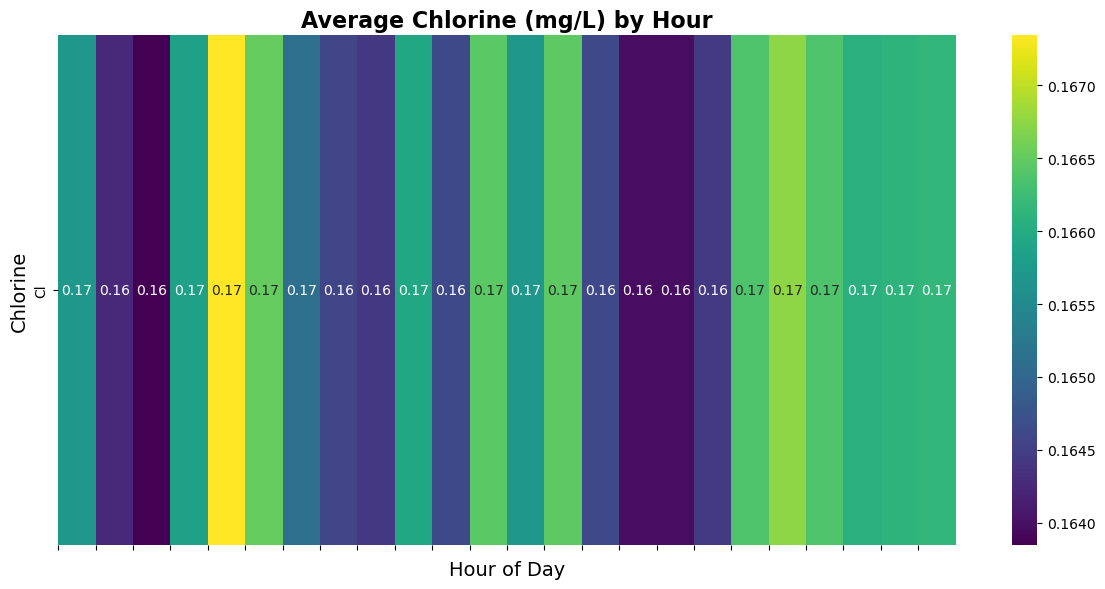

In [81]:
heatmap_data = water_df.pivot_table(index='Hours', values='Cl', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap='viridis', annot=True, fmt=".2f")
plt.title("Average Chlorine (mg/L) by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Chlorine", fontsize=14)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

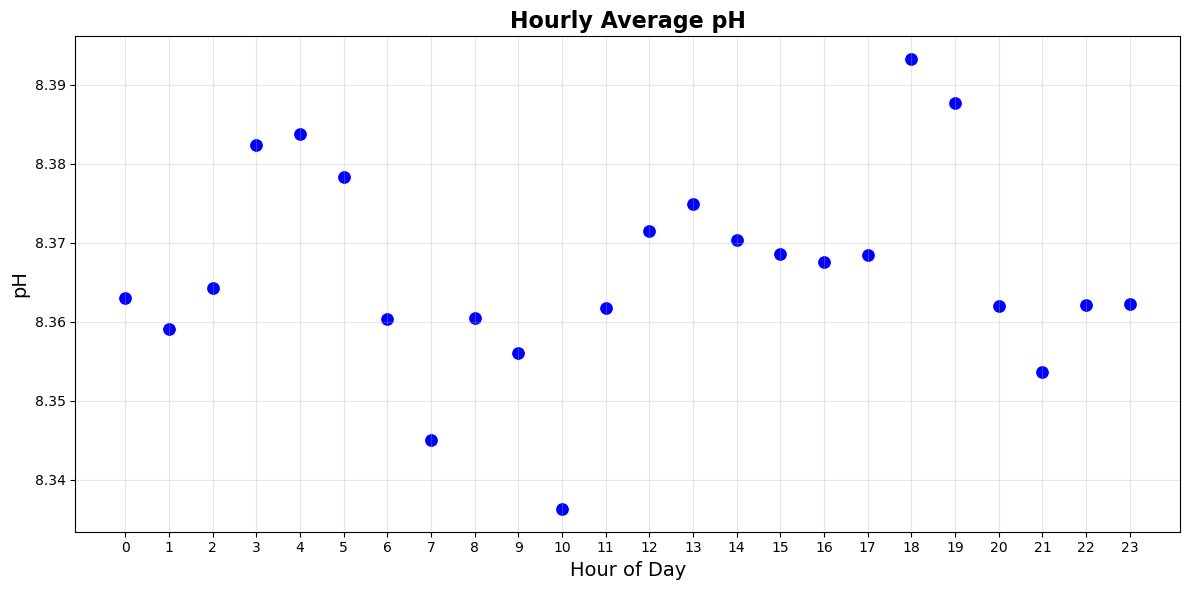

In [82]:
hourly_agg = water_df.groupby('Hours')['pH'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hourly_agg, x='Hours', y='pH', s=100, color='blue')
plt.title("Hourly Average pH", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [83]:
#  plt.figure(figsize=(12, 6))
# sns.kdeplot(data=water_df, x='Hours', y='Cl', cmap='viridis', fill=True)
# plt.title("Chlorine Density by Hour", fontsize=16, fontweight='bold')
# plt.xlabel("Hour of Day", fontsize=14)
# plt.ylabel("Chlorine (mg/L)", fontsize=14)
# plt.xticks(range(0, 24))
# plt.tight_layout()
# plt.show() 

#### Is there a time of the day when the quality of the water is the worst?
##### no, its constant during the day


array([<Axes: xlabel='Hours'>, <Axes: xlabel='Hours'>,
       <Axes: xlabel='Hours'>, <Axes: xlabel='Hours'>,
       <Axes: xlabel='Hours'>, <Axes: xlabel='Hours'>], dtype=object)

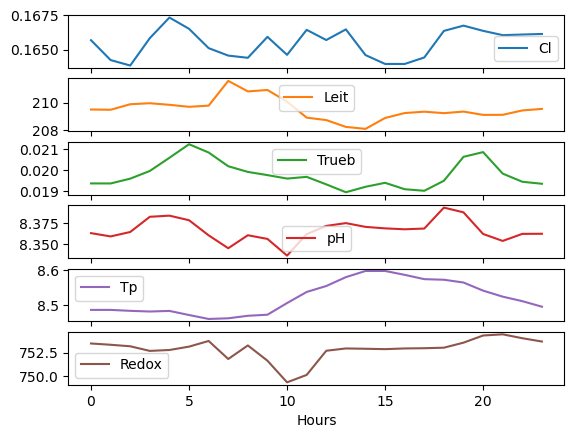

In [87]:
hours_df = water_df.groupby('Hours').agg({'Cl':'mean','Leit':'mean','Trueb':'mean','pH':'mean','Tp':'mean','Redox':'mean'})
hours_df.plot(subplots = True)

#### Is there a day of the week when the quality of the water is the worst? 


array([<Axes: xlabel='Day of week'>, <Axes: xlabel='Day of week'>,
       <Axes: xlabel='Day of week'>, <Axes: xlabel='Day of week'>,
       <Axes: xlabel='Day of week'>, <Axes: xlabel='Day of week'>],
      dtype=object)

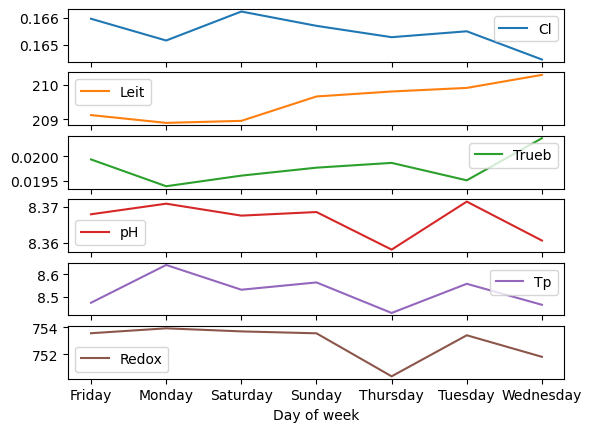

In [90]:
day_df = water_df.groupby('Day of week').agg({'Cl':'mean','Leit':'mean','Trueb':'mean','pH':'mean','Tp':'mean','Redox':'mean'})
day_df.plot(subplots=True)

<Axes: xlabel='Day of week'>

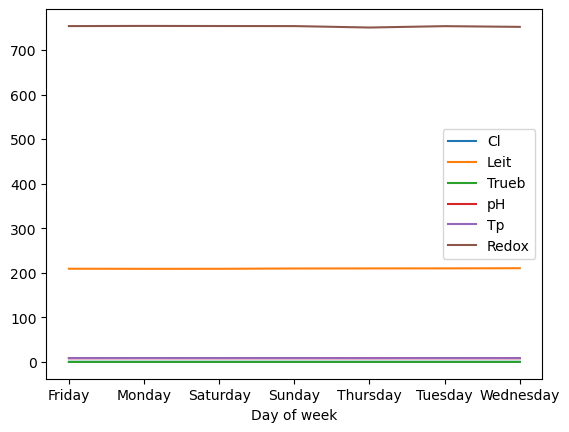

In [139]:
day_df = water_df.groupby('Day of week').agg({'Cl':'mean','Leit':'mean','Trueb':'mean','pH':'mean','Tp':'mean','Redox':'mean'})
day_df.plot()

array([<Axes: xlabel='Day of week'>, <Axes: xlabel='Day of week'>,
       <Axes: xlabel='Day of week'>], dtype=object)

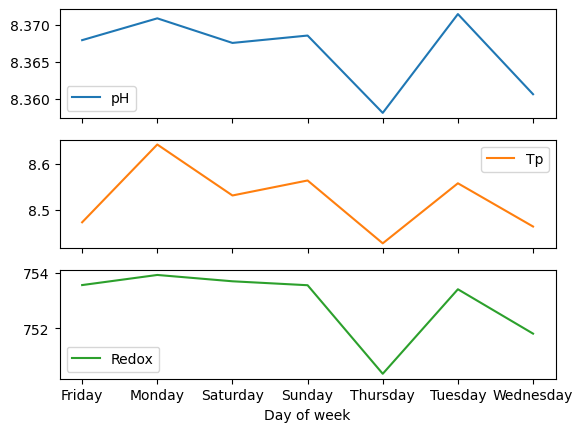

In [91]:
day_df = water_df.groupby('Day of week').agg({'pH':'mean','Tp':'mean','Redox':'mean'})
day_df.plot(subplots=True)

In [159]:
redox = water_df['Redox']

In [169]:
df = water_df.copy()

In [171]:
df['redox_optimal_min'] = 250

In [222]:
df[['Redox']].min(),df[['Redox']].max()

(Redox    300.0
 dtype: float64,
 Redox    895.0
 dtype: float64)

In [ ]:
df.Cl.plot(kind='bar')

# PH PLOT 

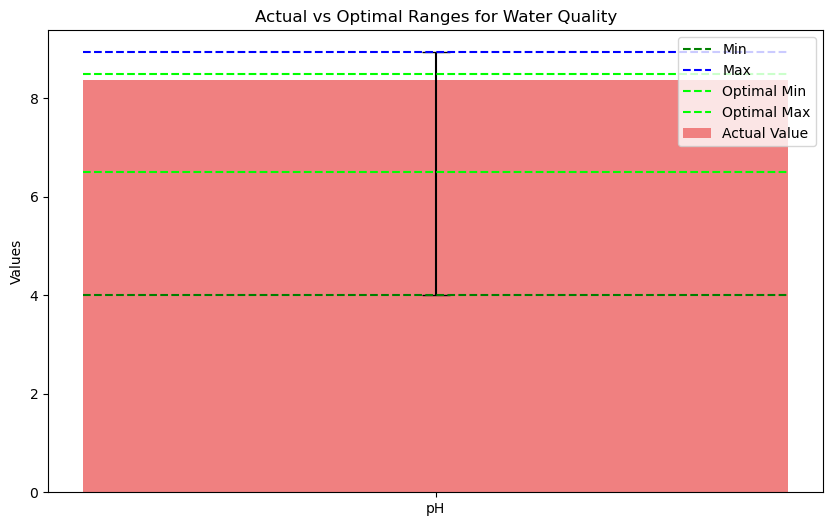

In [274]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and values
parameters = ['pH']  # Parameters for comparison

# Calculate actual values (median)
actual_value = df[parameters].median().tolist()  # Use median as the representative value
min_ = df[parameters].min().tolist()  # Min values for each parameter
max_ = df[parameters].max().tolist()  # Max values for each parameter

# Predefined optimal min and max for each parameter
optimal_min = [ 6.5]  # Min optimal values for Redox, Cl, pH
optimal_max = [8.5]  # Max optimal values for Redox, Cl, pH

# Calculate the error bars (ensure non-negative)
lower_error = [max(0, actual_value[i] - min_[i]) for i in range(len(parameters))]
upper_error = [max(0, max_[i] - actual_value[i]) for i in range(len(parameters))]
errors = (lower_error, upper_error)  # Format as a tuple of lists

# X positions for the bars
x = np.arange(len(parameters))
width = 0.5  # Width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values with asymmetric error bars
bars = ax.bar(x, actual_value, width, color='lightcoral', label='Actual Value', yerr=errors, capsize=10)

# Add horizontal dashed lines for min/max values
for i in range(len(parameters)):
    ax.hlines(min_[i], x[i] - width/2, x[i] + width/2, color='green', linestyle='dashed', label='Min' if i == 0 else "")
    ax.hlines(max_[i], x[i] - width/2, x[i] + width/2, color='blue', linestyle='dashed', label='Max' if i == 0 else "")

# Add horizontal dashed lines for optimal min/max values
for i in range(len(parameters)):
    ax.hlines(optimal_min[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Min' if i == 0 else "")
    ax.hlines(optimal_max[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Max' if i == 0 else "")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(parameters)
ax.set_ylabel('Values')
ax.set_title('Actual vs Optimal Ranges for Water Quality')
ax.legend()

# Show the chart
plt.show()

In [278]:
f = (df['pH'] >= df['pH'].min()) & (df['pH'] <= df['pH'].max())
df[f].shape[0]

138521

In [280]:
f = (df['pH'] >= 6.5) & (df['pH'] <= 8.5)
df[f].shape[0]

137040

# Cl plot

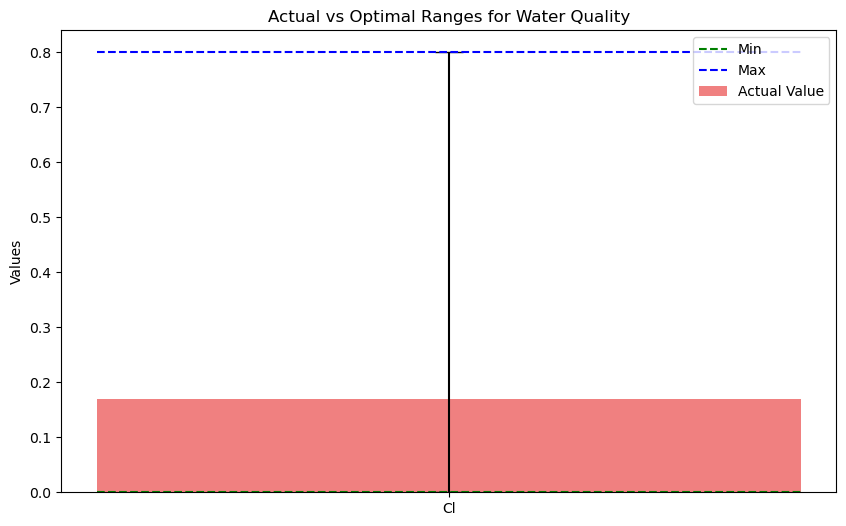

In [254]:
parameters = [ 'Cl']  # Parameters for comparison

# Calculate actual values (median)
actual_value = df[parameters].median().tolist()  # Use median as the representative value
min_ = df[parameters].min().tolist()  # Min values for each parameter
max_ = df[parameters].max().tolist()  # Max values for each parameter

# Predefined optimal min and max for each parameter
optimal_min = [0.1]  # Min optimal values for Redox, Cl, pH
optimal_max = [ 0.8]  # Max optimal values for Redox, Cl, pH

# Calculate the error bars (ensure non-negative)
lower_error = [max(0, actual_value[i] - min_[i]) for i in range(len(parameters))]
upper_error = [max(0, max_[i] - actual_value[i]) for i in range(len(parameters))]
errors = (lower_error, upper_error)  # Format as a tuple of lists

# X positions for the bars
x = np.arange(len(parameters))
width = 0.5  # Width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values with asymmetric error bars
bars = ax.bar(x, actual_value, width, color='lightcoral', label='Actual Value', yerr=errors, capsize=10)

# Add horizontal dashed lines for min/max values
for i in range(len(parameters)):
    ax.hlines(min_[i], x[i] - width/2, x[i] + width/2, color='green', linestyle='dashed', label='Min' if i == 0 else "")
    ax.hlines(max_[i], x[i] - width/2, x[i] + width/2, color='blue', linestyle='dashed', label='Max' if i == 0 else "")

# # Add horizontal dashed lines for optimal min/max values
# for i in range(len(parameters)):
#     ax.hlines(optimal_min[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Min' if i == 0 else "")
#     ax.hlines(optimal_max[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Max' if i == 0 else "")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(parameters)
ax.set_ylabel('Values')
ax.set_title('Actual vs Optimal Ranges for Water Quality')
ax.legend()

# Show the chart
plt.show()


# Redox plot

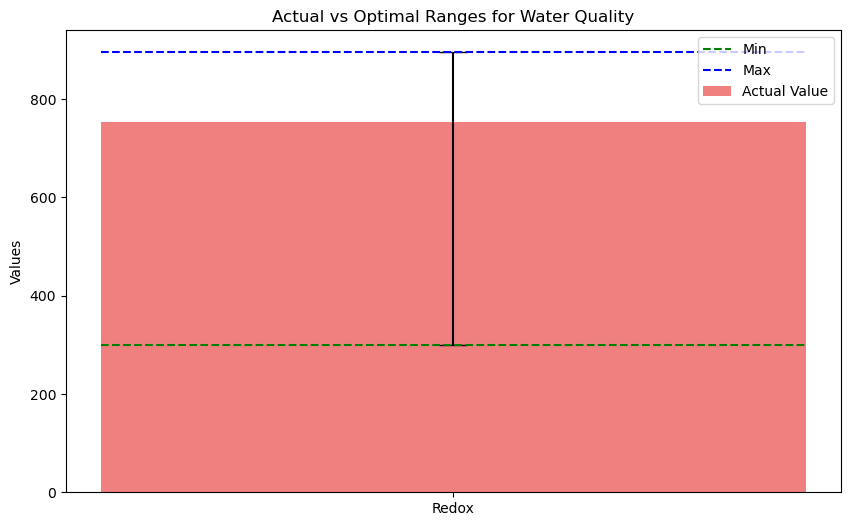

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and values
parameters = ['Redox']  # Parameters for comparison

# Calculate actual values (median)
actual_value = df[parameters].median().tolist()  # Use median as the representative value
min_ = df[parameters].min().tolist()  # Min values for each parameter
max_ = df[parameters].max().tolist()  # Max values for each parameter

# Predefined optimal min and max for each parameter
optimal_min = [250]  # Min optimal values for Redox, Cl, pH
optimal_max = [600]  # Max optimal values for Redox, Cl, pH

# Calculate the error bars (ensure non-negative)
lower_error = [max(0, actual_value[i] - min_[i]) for i in range(len(parameters))]
upper_error = [max(0, max_[i] - actual_value[i]) for i in range(len(parameters))]
errors = (lower_error, upper_error)  # Format as a tuple of lists

# X positions for the bars
x = np.arange(len(parameters))
width = 0.5  # Width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values with asymmetric error bars
bars = ax.bar(x, actual_value, width, color='lightcoral', label='Actual Value', yerr=errors, capsize=10)

# Add horizontal dashed lines for min/max values
for i in range(len(parameters)):
    ax.hlines(min_[i], x[i] - width/2, x[i] + width/2, color='green', linestyle='dashed', label='Min' if i == 0 else "")
    ax.hlines(max_[i], x[i] - width/2, x[i] + width/2, color='blue', linestyle='dashed', label='Max' if i == 0 else "")

# # Add horizontal dashed lines for optimal min/max values
# for i in range(len(parameters)):
#     ax.hlines(optimal_min[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Min' if i == 0 else "")
#     ax.hlines(optimal_max[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Max' if i == 0 else "")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(parameters)
ax.set_ylabel('Values')
ax.set_title('Actual vs Optimal Ranges for Water Quality')
ax.legend()

# Show the chart
plt.show()

# Everything

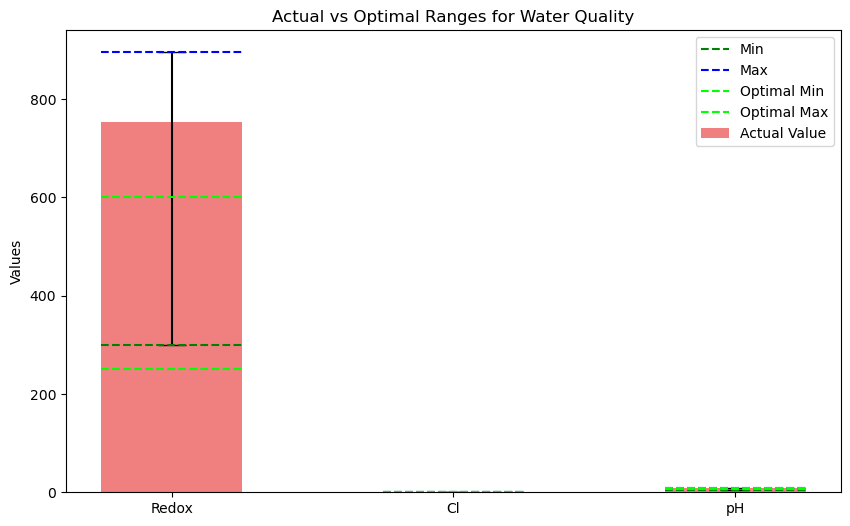

In [248]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and values
parameters = ['Redox', 'Cl', 'pH']  # Parameters for comparison

# Calculate actual values (median)
actual_value = df[parameters].median().tolist()  # Use median as the representative value
min_ = df[parameters].min().tolist()  # Min values for each parameter
max_ = df[parameters].max().tolist()  # Max values for each parameter

# Predefined optimal min and max for each parameter
optimal_min = [250, 0.1, 6.5]  # Min optimal values for Redox, Cl, pH
optimal_max = [600, 0.8, 8.5]  # Max optimal values for Redox, Cl, pH

# Calculate the error bars (ensure non-negative)
lower_error = [max(0, actual_value[i] - min_[i]) for i in range(len(parameters))]
upper_error = [max(0, max_[i] - actual_value[i]) for i in range(len(parameters))]
errors = (lower_error, upper_error)  # Format as a tuple of lists

# X positions for the bars
x = np.arange(len(parameters))
width = 0.5  # Width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values with asymmetric error bars
bars = ax.bar(x, actual_value, width, color='lightcoral', label='Actual Value', yerr=errors, capsize=10)

# Add horizontal dashed lines for min/max values
for i in range(len(parameters)):
    ax.hlines(min_[i], x[i] - width/2, x[i] + width/2, color='green', linestyle='dashed', label='Min' if i == 0 else "")
    ax.hlines(max_[i], x[i] - width/2, x[i] + width/2, color='blue', linestyle='dashed', label='Max' if i == 0 else "")

# Add horizontal dashed lines for optimal min/max values
for i in range(len(parameters)):
    ax.hlines(optimal_min[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Min' if i == 0 else "")
    ax.hlines(optimal_max[i], x[i] - width/2, x[i] + width/2, color='lime', linestyle='dashed', label='Optimal Max' if i == 0 else "")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(parameters)
ax.set_ylabel('Values')
ax.set_title('Actual vs Optimal Ranges for Water Quality')
ax.legend()

# Show the chart
plt.show()

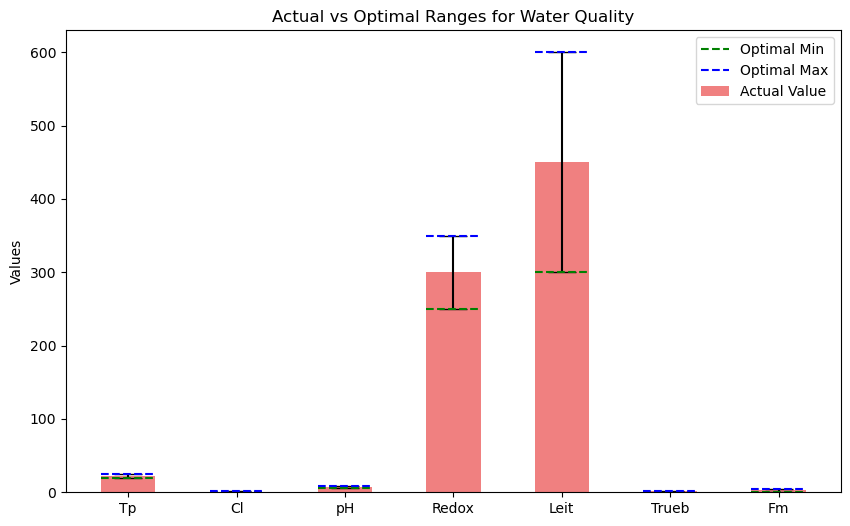

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters and values
parameters = ['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Fm']  # Columns to compare
actual_values = [22, 0.8, 7.5, 300, 450, 1.2, 2.5]  # Example actual values
optimal_mins = [20, 0.5, 6.5, 250, 300, 0.5, 1.0]  # Min optimal values
optimal_maxs = [25, 1.2, 8.5, 350, 600, 2.0, 5.0]  # Max optimal values

# Calculate the error bars (optimal range width / 2)
errors = [(np.array(optimal_maxs) - np.array(optimal_mins)) / 2]

# X positions for the bars
x = np.arange(len(parameters))
width = 0.5  # Width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values with error bars
bars = ax.bar(x, actual_values, width, color='lightcoral', label='Actual Value', yerr=errors, capsize=10)

# Add horizontal dashed lines for optimal ranges
for i, (min_val, max_val) in enumerate(zip(optimal_mins, optimal_maxs)):
    ax.plot([i - width/2, i + width/2], [min_val, min_val], color='green', linestyle='dashed', label='Optimal Min' if i == 0 else "")
    ax.plot([i - width/2, i + width/2], [max_val, max_val], color='blue', linestyle='dashed', label='Optimal Max' if i == 0 else "")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(parameters)
ax.set_ylabel('Values')
ax.set_title('Actual vs Optimal Ranges for Water Quality')
ax.legend()

# Show the chart
plt.show()

In [143]:
import matplotlib.pyplot as plt
import numpy as np

day_df = water_df.groupby('Day of week').agg({'Cl':'mean','Leit':'mean','Trueb':'mean','pH':'mean','Tp':'mean','Redox':'mean'})
day_df.plt()

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, actual_values, width, label='Actual', color='lightcoral')
bars2 = ax.bar(x + width/2, optimal_values, width, label='Optimal', color='lightblue')


AttributeError: 'DataFrame' object has no attribute 'plt'

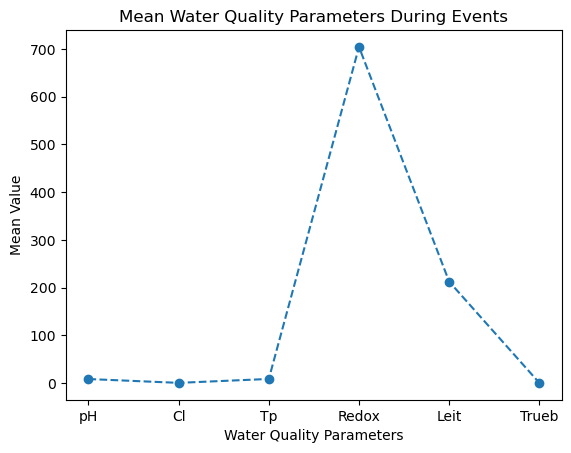

In [92]:
event_cond = water_df["EVENT"] == True
event_t_df = water_df[event_cond].agg({'pH':'mean', 'Cl':'mean','Tp':'mean','Redox':'mean','Leit':'mean','Trueb':'mean'})
event_t_df[['pH', 'Cl', 'Tp', 'Redox', 'Leit', 'Trueb']].plot(marker='o', linestyle='--')
plt.ylabel("Mean Value")
plt.title("Mean Water Quality Parameters During Events")
plt.xlabel("Water Quality Parameters")
plt.show()

In [93]:
top_event_days = water_df["Date"][water_df["EVENT"] == True].value_counts().head()
top_event_days_df =water_df[water_df["Date"].isin(top_event_days.index)]
top_event_days_df.reset_index()


,index,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
0,49691,2016-09-07 00:00:00,7.7,0.17,8.39,752.0,211.0,0.026,0.110,1668.0,829.0,False,2016-09-07,00:00:00,9,0,Wednesday
1,49692,2016-09-07 00:01:00,7.7,0.17,8.39,752.0,211.0,0.026,0.111,1662.0,826.0,False,2016-09-07,00:01:00,9,0,Wednesday
2,49693,2016-09-07 00:02:00,7.7,0.17,8.39,753.0,211.0,0.026,0.113,1689.0,818.0,False,2016-09-07,00:02:00,9,0,Wednesday
3,49694,2016-09-07 00:03:00,7.7,0.17,8.39,752.0,211.0,0.026,0.113,1645.0,826.0,False,2016-09-07,00:03:00,9,0,Wednesday
4,49695,2016-09-07 00:04:00,7.7,0.17,8.39,752.0,211.0,0.026,0.114,1659.0,832.0,False,2016-09-07,00:04:00,9,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,78486,2016-09-26 23:55:00,8.6,0.17,8.37,755.0,214.0,0.015,0.106,1627.0,847.0,False,2016-09-26,23:55:00,9,23,Monday
7196,78487,2016-09-26 23:56:00,8.6,0.17,8.37,755.0,214.0,0.015,0.108,1599.0,847.0,False,2016-09-26,23:56:00,9,23,Monday
7197,78488,2016-09-26 23:57:00,8.6,0.17,8.37,755.0,214.0,0.015,0.106,1659.0,847.0,False,2016-09-26,23:57:00,9,23,Monday
7198,78489,2016-09-26 23:58:00,8.6,0.17,8.37,755.0,211.0,0.015,0.106,1593.0,846.0,False,2016-09-26,23:58:00,9,23,Monday


### 2016-09-14	is the day with most events occured
##### and the table above shows the top 5 dates 

## Exploring reasons behind EVENTS

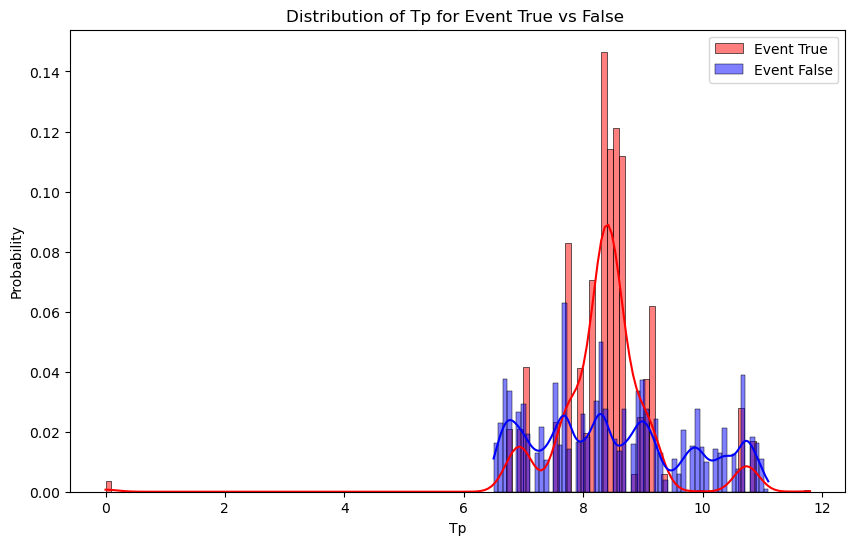

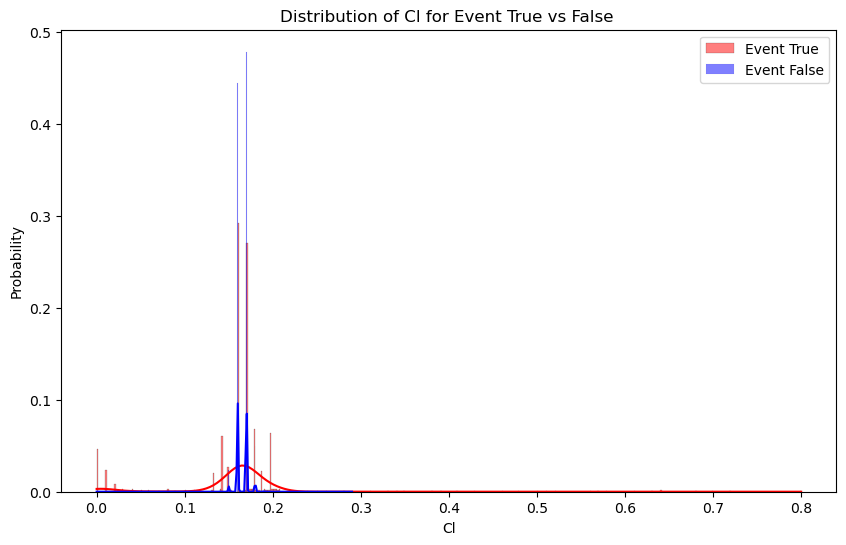

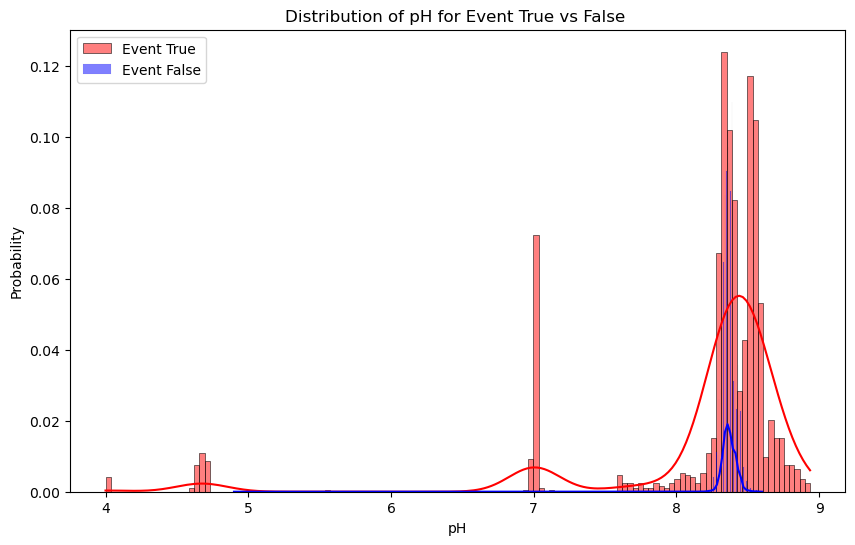

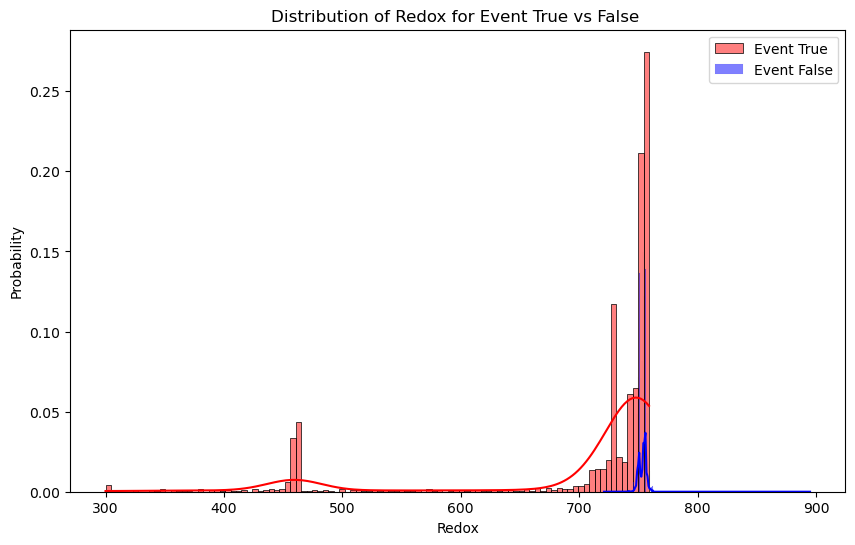

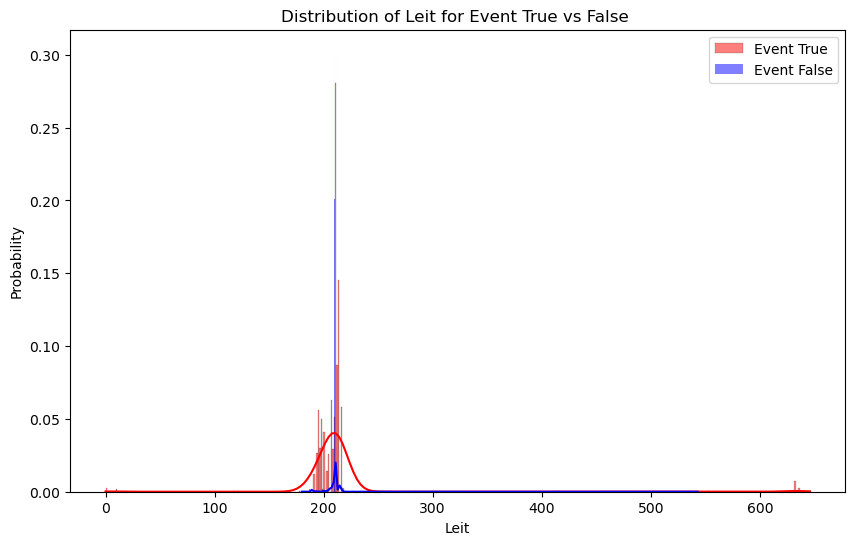

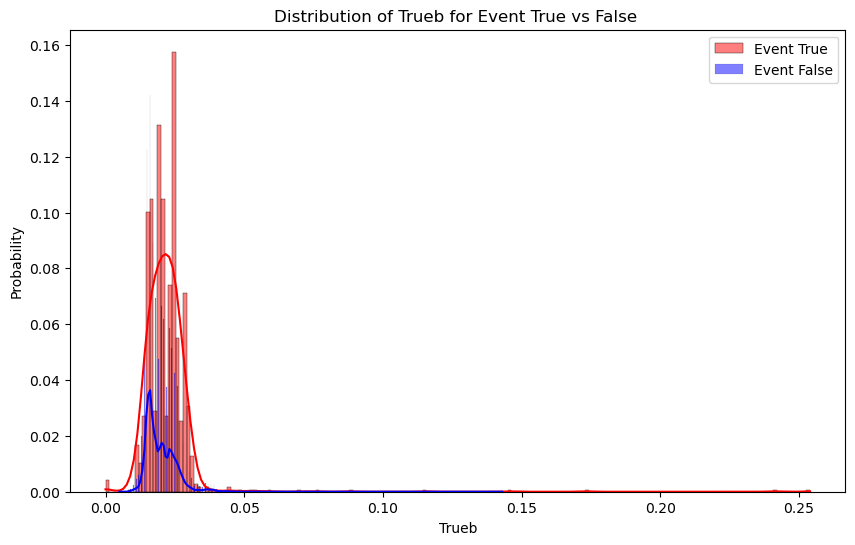

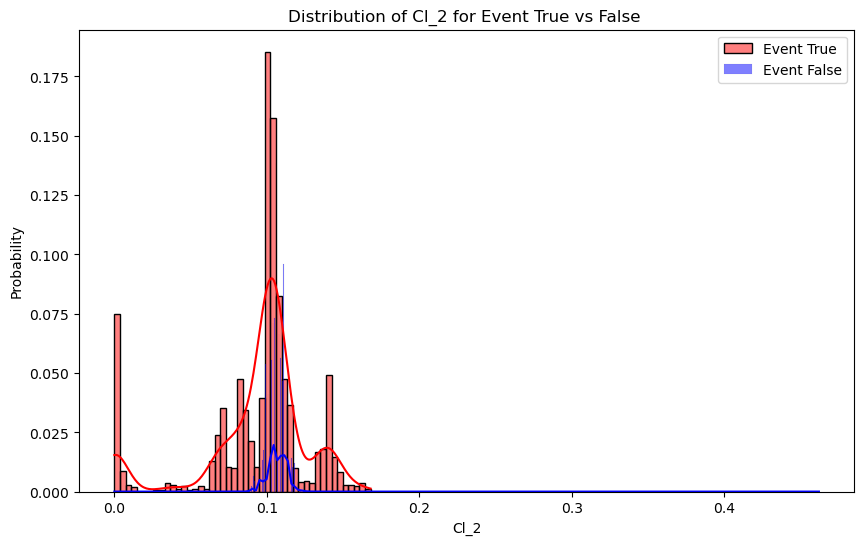

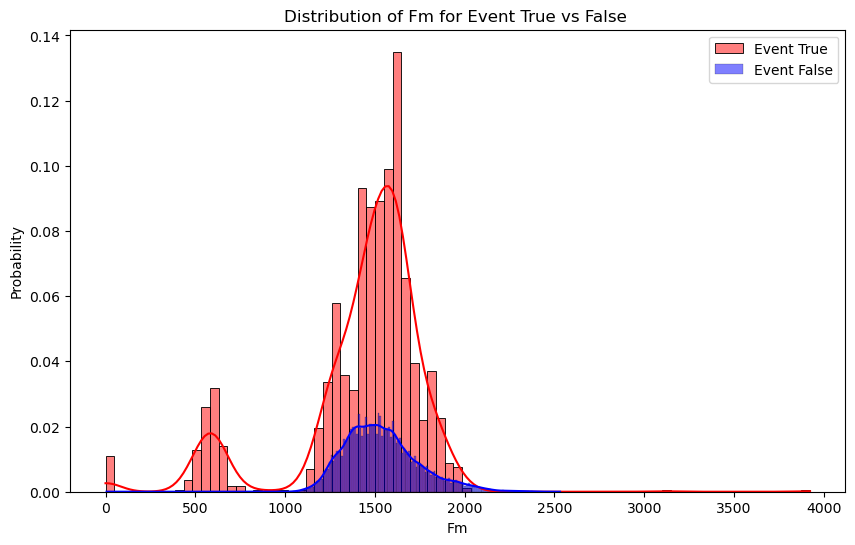

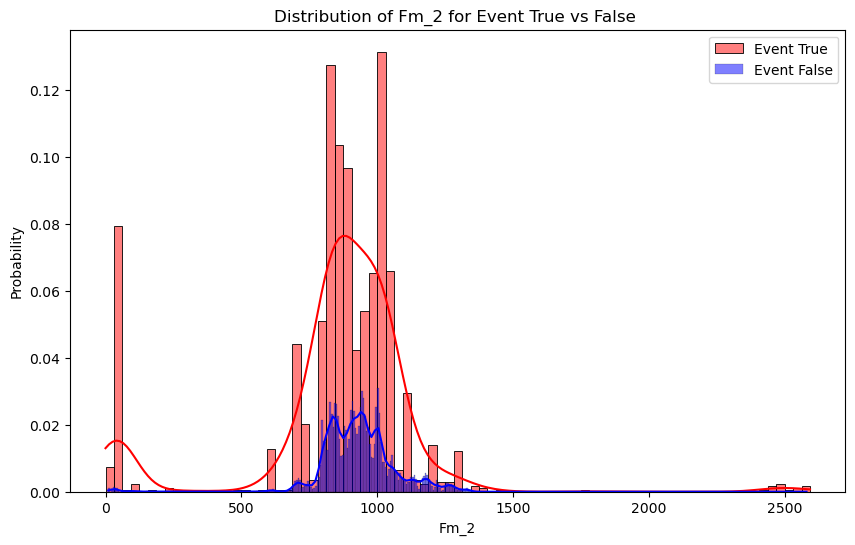

In [97]:
event_true = water_df[water_df["EVENT"] == True]
event_false = water_df[water_df["EVENT"] == False]
parameters = ["Tp", "Cl", "pH", "Redox", "Leit", "Trueb", "Cl_2", "Fm", "Fm_2"]
for x in parameters:
    plt.figure(figsize=(10, 6))
    sns.histplot(event_true[x],color='red', label='Event True',kde=True, stat='probability')
    sns.histplot(event_false[x],color='blue', label='Event False', kde=True, stat='probability')
    plt.title(f"Distribution of {x} for Event True vs False ")
    plt.legend()
    plt.show()

## For Temp most events occur in the range 8-9 C
## Most events occur in the Cl range of 0.1 to 0.25 mg/L
## Redox is out of ideal range . 280 column only < 700, 138000 have a redox  > 700
## most data have acceptable pH

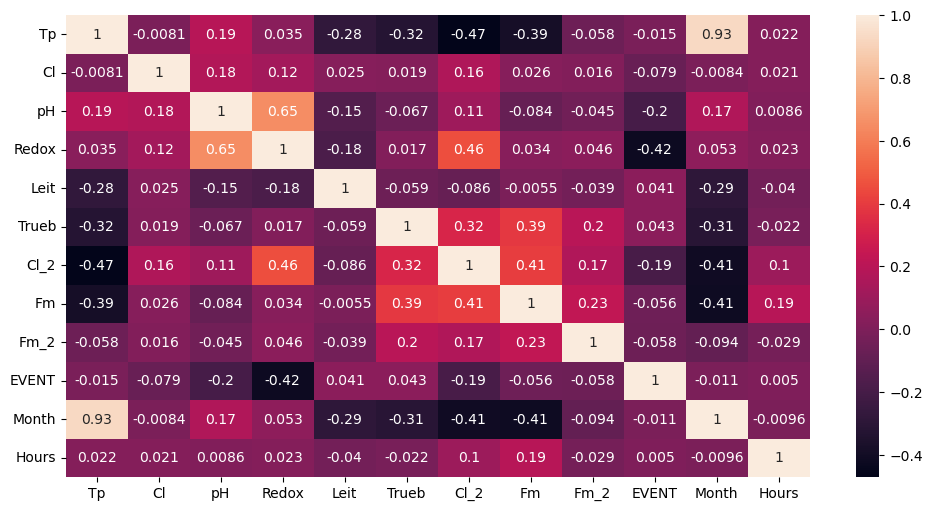

In [99]:
plt.figure(figsize=(12, 6))
water_cor = water_df.corr(numeric_only=True)
sns.heatmap(water_cor , annot=True);


In [101]:
water_df.columns

Index(['Time', 'Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm',
       'Fm_2', 'EVENT', 'Date', 'Time_only', 'Month', 'Hours', 'Day of week'],
      dtype='object')

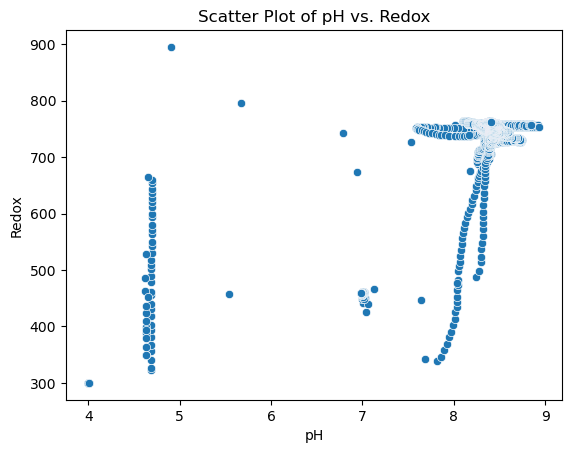

In [102]:
sns.scatterplot(data=water_df, x='pH', y='Redox')
plt.title('Scatter Plot of pH vs. Redox')
plt.show()

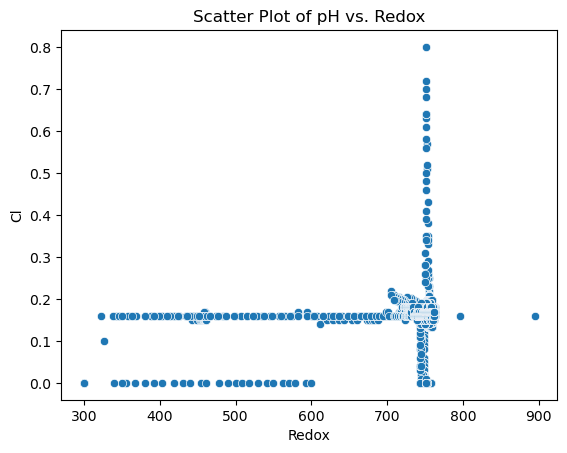

In [104]:
sns.scatterplot(data=water_df, x='Redox', y='Cl')
plt.title('Scatter Plot of pH vs. Redox')
plt.show()

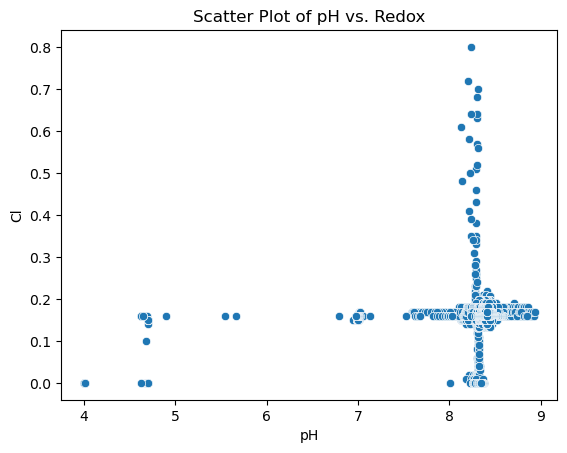

In [106]:
sns.scatterplot(data=water_df, x='pH', y='Cl')
plt.title('Scatter Plot of pH vs. Redox')
plt.show()

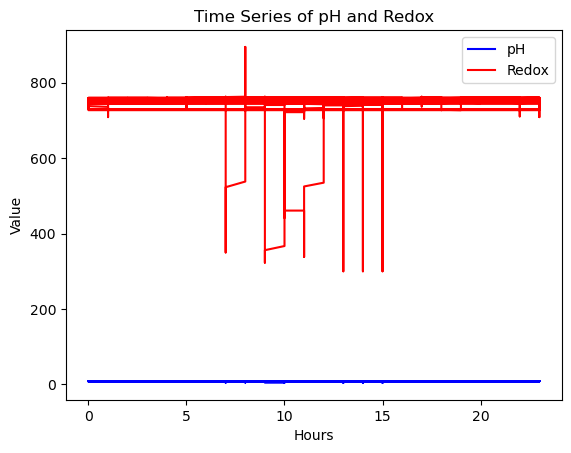

In [111]:
plt.plot(water_df['Hours'], water_df['pH'], label='pH', color='blue')
plt.plot(water_df['Hours'], water_df['Redox'], label='Redox', color='red')
plt.xlabel('Hours')
plt.ylabel('Value')
plt.title('Time Series of pH and Redox')
plt.legend()
plt.show()


In [112]:
f = water_df["Redox"] < 700
water_df[f]

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
50254,2016-09-07 09:23:00,7.7,0.16,7.64,446.0,122.0,0.025,0.004,1549.0,806.0,True,2016-09-07,09:23:00,9,9,Wednesday
50255,2016-09-07 09:24:00,7.7,0.16,7.03,450.0,415.0,0.025,0.002,1587.0,812.0,True,2016-09-07,09:24:00,9,9,Wednesday
50256,2016-09-07 09:25:00,7.7,0.16,7.01,454.0,381.0,0.025,0.000,1576.0,814.0,True,2016-09-07,09:25:00,9,9,Wednesday
50257,2016-09-07 09:26:00,7.7,0.16,7.00,457.0,323.0,0.025,0.000,1579.0,814.0,True,2016-09-07,09:26:00,9,9,Wednesday
50258,2016-09-07 09:27:00,7.7,0.16,7.00,458.0,285.0,0.025,0.000,1587.0,811.0,True,2016-09-07,09:27:00,9,9,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132325,2016-11-03 08:14:00,10.7,0.16,8.34,679.0,196.0,0.021,0.103,1726.0,1000.0,True,2016-11-03,08:14:00,11,8,Thursday
132326,2016-11-03 08:15:00,10.7,0.16,8.34,685.0,196.0,0.020,0.102,1700.0,990.0,True,2016-11-03,08:15:00,11,8,Thursday
132327,2016-11-03 08:16:00,10.7,0.16,8.34,689.0,196.0,0.020,0.103,1753.0,991.0,True,2016-11-03,08:16:00,11,8,Thursday
132328,2016-11-03 08:17:00,10.7,0.16,8.35,695.0,196.0,0.020,0.103,1700.0,995.0,True,2016-11-03,08:17:00,11,8,Thursday


In [115]:
f = (water_df["pH"] >= 6.5 ) & (water_df["pH"] <=8.5)
water_df[f]


,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,2016-08-03,11:49:00,8,11,Wednesday
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,2016-08-03,11:50:00,8,11,Wednesday
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,2016-08-03,11:51:00,8,11,Wednesday
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,2016-08-03,11:52:00,8,11,Wednesday
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,2016-08-03,11:53:00,8,11,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139561,2016-11-08 08:50:00,10.1,0.16,8.41,762.0,189.0,0.023,0.105,1799.0,924.0,False,2016-11-08,08:50:00,11,8,Tuesday
139562,2016-11-08 08:51:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1835.0,927.0,False,2016-11-08,08:51:00,11,8,Tuesday
139563,2016-11-08 08:52:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1807.0,924.0,False,2016-11-08,08:52:00,11,8,Tuesday
139564,2016-11-08 08:53:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1799.0,930.0,False,2016-11-08,08:53:00,11,8,Tuesday
